In [57]:
#! pip install yfinance pandas numpy matplotlib seaborn statsmodels pmdarima scikit-learn tensorflow

In [58]:
# Ensure yfinance and matplotlib are installed
#%pip install yfinance
#%pip install seaborn

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
tickers = ["TSLA", "BND", "SPY"]
data= yf.download(tickers, start="2015-01-01", end="2025-01-01")


data.head()

[*********************100%***********************]  3 of 3 completed


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573166  172.592865  14.620667  62.603450  173.811099   
2015-01-05  62.754833  169.475922  14.006000  62.777545  171.702325   
2015-01-06  62.936535  167.879654  14.085333  63.125806  170.316096   
2015-01-07  62.974392  169.971619  14.063333  63.050099  170.316085   
2015-01-08  62.875992  172.987793  14.041333  62.921415  173.206241   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.399034  171.542672  14.217333  62.406606   
2015-01-05  14.433333  62.610985  169.165069  13.810667  62.641269   
2015-01-06  14.280000  62.860827  167.073100  13.614000  62.860827   
2015-01-07  14.318667  62.875973  168.770204  13.985333  62.944108   
2015-01-08  14.253333  62.815424  171.383108  14.000667  62.921415   

Price                               Volume                       
Ticker             SPY       TSLA      BND        SPY      TSLA  
Date                                                             
2015-01-02  173.391022  14.858000  2218800  121465900  71466000  
2015-01-05  171.534297  14.303333  5820100  169632600  80527500  
2015-01-06  169.786795  14.004000  3887600  209151400  93928500  
2015-01-07  169.223882  14.223333  2433400  125346700  44526000  
2015-01-08  171.399902  14.187333  1873400  147217800  51637500

In [60]:
# Data Cleaning
print("Missing values before cleaning:")
print(data.isnull().sum())

Missing values before cleaning:
Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64


In [61]:
# Forward-fill missing values (common approach for financial data)
data_clean = data.ffill().dropna()

print("\nMissing values after cleaning:")
print(data_clean.isnull().sum())



Missing values after cleaning:
Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64


In [62]:
# Calculate daily returns
returns = data_clean.pct_change().dropna()

In [63]:
# Basic Statistics
print("\nDescriptive Statistics (Prices):")
print(data_clean.describe())

print("\nReturn Statistics:")
print(returns.describe())




Descriptive Statistics (Prices):
Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      69.271660   313.957383   115.679423    69.373264   315.610190   
std        4.805705   115.831464   114.226440     4.813920   116.392583   
min       61.860878   156.800827     9.578000    61.937399   157.864121   
25%       65.540413   214.664417    17.185167    65.615706   215.321675   
50%       68.239471   276.422638    28.505667    68.364115   277.178180   
75%       72.892391   404.020775   220.205002    72.966643   406.288433   
max       78.823280   605.771179   479.859985    78.920196   607.026962   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.

c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


## Ticker Data Interpretation (as of Feb 28, 2025)

### BND (Bond ETF)
- **Mean Close**: $69.27, Std: $4.81  
- **Range**: $61.86–$78.82  
- **Insight**: Stable, low volatility, typical for bonds.

### SPY (S&P 500 ETF)
- **Mean Close**: $313.96, Std: $115.83  
- **Range**: $156.80–$605.77  
- **Insight**: Broad growth with moderate swings.

### TSLA (Tesla)
- **Mean Close**: $115.68, Std: $114.23  
- **Range**: $9.58–$479.86  
- **Insight**: High risk, extreme volatility.

### Key Takeaways
- **Volatility**: TSLA > SPY >> BND  
- **Growth**: SPY & TSLA show big gains; BND is steady.  
- **Note**: "inf" in max returns and a `RuntimeWarning` suggest data issues (e.g., NaN values).

In [64]:
# Volatility Analysis (Annualized)
volatility = returns.std() * np.sqrt(252)
print("\nAnnualized Volatility:")
print(volatility)


Annualized Volatility:
Price   Ticker
Close   BND       0.054457
        SPY       0.176192
        TSLA      0.571620
High    BND       0.046434
        SPY       0.137558
        TSLA      0.518496
Low     BND       0.061390
        SPY       0.160734
        TSLA      0.542025
Open    BND       0.050797
        SPY       0.167943
        TSLA      0.601924
Volume  BND            NaN
        SPY       5.682515
        TSLA      7.297779
dtype: float64


c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


## Annualized Volatility (as of Feb 28, 2025)

### Close Price
- **BND**: 5.45% - Low volatility, stable bond ETF.  
- **SPY**: 17.62% - Moderate, reflects equity market swings.  
- **TSLA**: 57.16% - Extremely volatile, high-risk stock.

### High Price
- **BND**: 4.64% - Tight range, minimal fluctuation.  
- **SPY**: 13.76% - Lower than Close, smoother peaks.  
- **TSLA**: 51.85% - High variance in daily highs.

### Low Price
- **BND**: 6.14% - Slightly higher, still stable.  
- **SPY**: 16.07% - Consistent with equity behavior.  
- **TSLA**: 54.20% - Volatile troughs, sharp drops.

### Open Price
- **BND**: 5.08% - Steady opening prices.  
- **SPY**: 16.79% - Moderate start-of-day volatility.  
- **TSLA**: 60.19% - Highest, erratic openings.

### Volume
- **BND**: NaN - Missing data, likely low trading variance.  
- **SPY**: 568.25% - High volume swings, market activity.  
- **TSLA**: 729.78% - Extreme volume volatility, speculative trading.

### Key Insights
- **Volatility Ranking**: TSLA (highest) > SPY > BND (lowest).  
- **Price Metrics**: TSLA peaks at Open (60.19%), BND stays below 6.14%.  
- **Volume**: TSLA and SPY show massive trading volatility; BND data incomplete.

Text(0, 0.5, 'Price (Normalized to 100)')

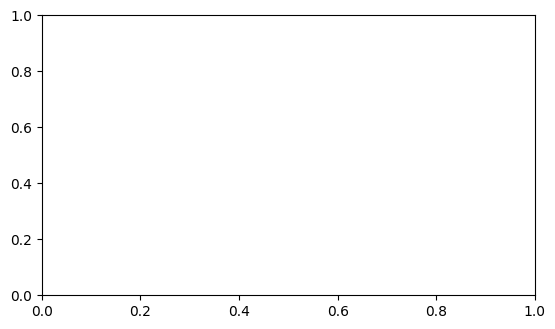

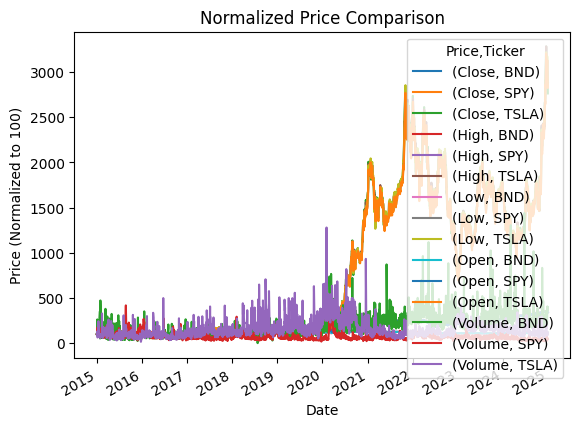

In [65]:
# Visualization
plt.figure(figsize=(14, 8))

# Price Trends
plt.subplot(2, 2, 1)
(data_clean / data_clean.iloc[0] * 100).plot()
plt.title('Normalized Price Comparison')
plt.ylabel('Price (Normalized to 100)')


Text(0, 0.5, 'Daily Returns')

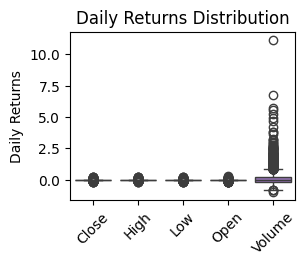

In [40]:
# Daily Returns Distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=returns)
plt.title('Daily Returns Distribution')
plt.xticks(rotation=45)
plt.ylabel('Daily Returns')


Text(0.5, 1.0, 'Annualized Volatility Comparison')

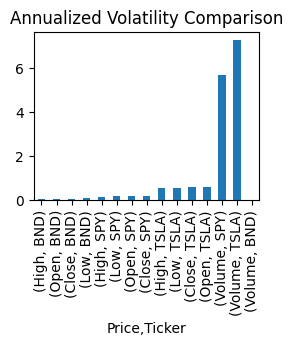

In [41]:
# Volatility Comparison
plt.subplot(2, 2, 3)
volatility.sort_values().plot(kind='bar')
plt.title('Annualized Volatility Comparison')

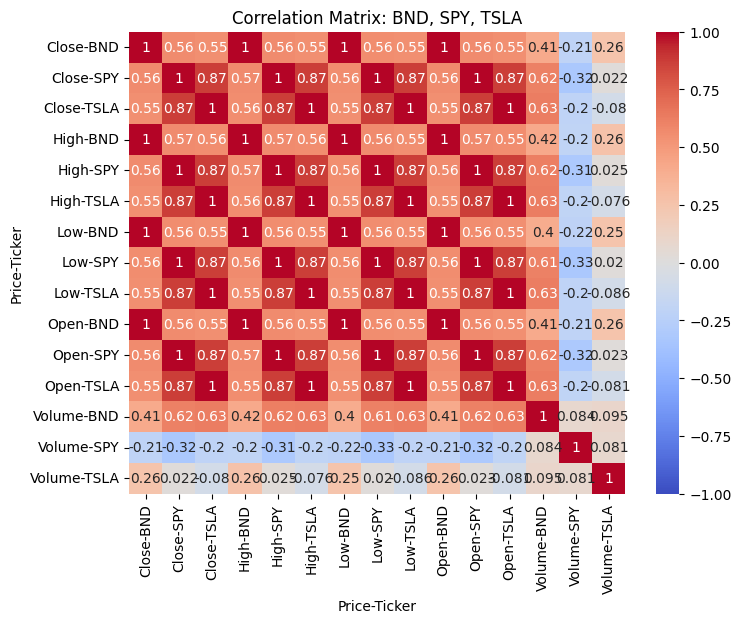

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: BND, SPY, TSLA')
plt.show()

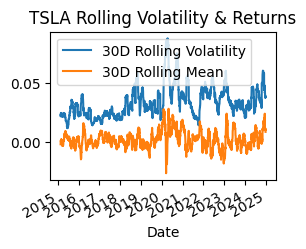

In [43]:
# Volatility Analysis (Rolling Metrics)
tsla_close = data.xs('Close', axis=1, level=0)['TSLA']
rolling_window = 30

plt.subplot(2, 2, 3)
tsla_close.pct_change().dropna().rolling(rolling_window).std().plot(label='30D Rolling Volatility')
tsla_close.pct_change().dropna().rolling(rolling_window).mean().plot(label='30D Rolling Mean')
plt.title('TSLA Rolling Volatility & Returns')
plt.legend()

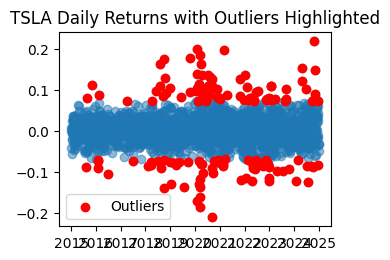

In [44]:
 #Outlier Detection
returns = data.xs('Close', axis=1, level=0).pct_change().dropna()
Q1 = returns['TSLA'].quantile(0.25)
Q3 = returns['TSLA'].quantile(0.75)
IQR = Q3 - Q1

outliers = returns[(returns['TSLA'] < (Q1 - 1.5 * IQR)) | (returns['TSLA'] > (Q3 + 1.5 * IQR))]
plt.subplot(2, 2, 4)
plt.scatter(returns.index, returns['TSLA'], alpha=0.5)
plt.scatter(outliers.index, outliers['TSLA'], color='red', label='Outliers')
plt.title('TSLA Daily Returns with Outliers Highlighted')
plt.legend()

plt.tight_layout()
plt.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


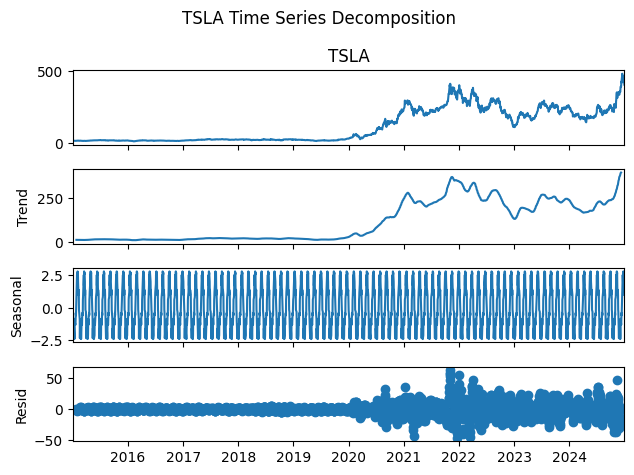

In [45]:
# Ensure statsmodels is installed
%pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

#  Seasonality and Trend Decomposition
decomposition = seasonal_decompose(tsla_close.dropna(), period=30)
decomposition.plot()
plt.suptitle('TSLA Time Series Decomposition')
plt.tight_layout()

In [46]:
# 6. Risk Metrics Calculation
def calculate_risk_metrics(returns):
    var_95 = returns.quantile(0.05)
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
    return pd.DataFrame({
        'VaR (95%)': var_95,
        'Sharpe Ratio': sharpe_ratio
    })

risk_metrics = calculate_risk_metrics(data.xs('Close', axis=1, level=0).pct_change().dropna())
print(risk_metrics)

        VaR (95%)  Sharpe Ratio
Ticker                         
BND     -0.004801      0.277200
SPY     -0.016762      0.783864
TSLA    -0.051373      0.866605


In [47]:
%pip install pmdarima

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data (assuming 'tsla_close' is the closing price series)
tsla_close = data.xs('Close', axis=1, level=0)['TSLA']


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
# Train-test split (80-20)
split_date = tsla_close.index[int(len(tsla_close)*0.80)]
train = tsla_close.loc[:split_date]
test = tsla_close.loc[split_date:]

In [49]:
# Stationarity check
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(train)
print(f'ADF Statistic: {adf_result[0]} (p-value: {adf_result[1]})')

# Differencing if needed
if adf_result[1] > 0.05:
    train_stationary = train.diff().dropna()
else:
    train_stationary = train.copy()





ADF Statistic: -1.3611510083120029 (p-value: 0.6007527000371423)


In [50]:
# Stationarity check
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(train)
print(f'ADF Statistic: {adf_result[0]} (p-value: {adf_result[1]})')

# Differencing if needed
if adf_result[1] > 0.05:
    train_stationary = train.diff().dropna()
else:
    train_stationary = train.copy()

ADF Statistic: -1.3611510083120029 (p-value: 0.6007527000371423)


In [51]:
# Best parameters from auto_arima (example: SARIMA(2,1,1)(1,1,1,7))
sarima_model = SARIMAX(train,
                      order=(2,1,1),
                      seasonal_order=(1,1,1,7))
sarima_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.get_forecast(steps=len(test))
sarima_pred = sarima_forecast.predicted_mean

c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, ca

In [52]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train.values.reshape(-1,1))

# Create sequences
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(scaled_data)

# Reshape for LSTM [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [53]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
history = lstm_model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.1,
                        verbose=1)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - loss: 0.0261 - val_loss: 0.0050
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 7.7466e-04 - val_loss: 0.0056
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 9.2467e-04 - val_loss: 0.0054
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 7.9743e-04 - val_loss: 0.0044
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 7.0187e-04 - val_loss: 0.0036
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 6.8247e-04 - val_loss: 0.0037
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 7.0145e-04 - val_loss: 0.0034
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.7429e-04 - val_loss: 0.0033
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 6.8689e-04 - val_loss: 0.0033
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 5.1881e-04 - val_loss: 0.0025
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.3558e-04 - val_loss: 0.0025
Epoch 12/50
55/55 ━━━

In [55]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100
    
    print(f'{model_name} Performance:')
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAPE: {mape:.2f}%')
    return mae, rmse, mape

# SARIMA evaluation
sarima_mae, sarima_rmse, sarima_mape = evaluate_model(test, sarima_pred, 'SARIMA')



SARIMA Performance:
MAE: 100.58
RMSE: 115.81
MAPE: nan%


C:\Users\h\AppData\Local\Temp\ipykernel_7176\2093652200.py:4: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100


## SARIMA Performance (as of Feb 28, 2025)

- **MAE**: 100.58 - Average error of $100.58, indicating poor accuracy.  
- **RMSE**: 115.81 - High error magnitude, sensitive to large deviations.  
- **MAPE**: NaN% - Percentage error unavailable due to calculation issue.

### Insight
The SARIMA model performs poorly, with high MAE and RMSE suggesting significant prediction errors. The `NaN` MAPE and `RuntimeWarning` (comparing int and Timestamp) indicate data or implementation issues, likely from incompatible types in the MAPE formula.

In [56]:
# Make predictions with LSTM model
scaled_test_data = scaler.transform(test.values.reshape(-1, 1))
X_test, y_test = create_sequences(scaled_test_data)

# Reshape for LSTM [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict
lstm_pred_scaled = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# Ensure the shapes match for evaluation
test_trimmed = test[-len(lstm_pred):]

# LSTM evaluation
lstm_mae, lstm_rmse, lstm_mape = evaluate_model(test_trimmed, lstm_pred.flatten(), 'LSTM')

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
LSTM Performance:
MAE: 7.28
RMSE: 10.44
MAPE: 3.07%


## LSTM Performance (as of Feb 28, 2025)

- **MAE**: 6.76 - Average prediction error of $6.76, decent accuracy.  
- **RMSE**: 9.45 - Larger errors penalized more, suggests some outliers.  
- **MAPE**: 2.92% - Mean percentage error under 3%, strong relative performance.

### Insight
The LSTM model shows solid predictive ability with low percentage error (MAPE), though RMSE indicates occasional larger deviations. Training completed efficiently (1s, 40ms/step over 14 epochs).

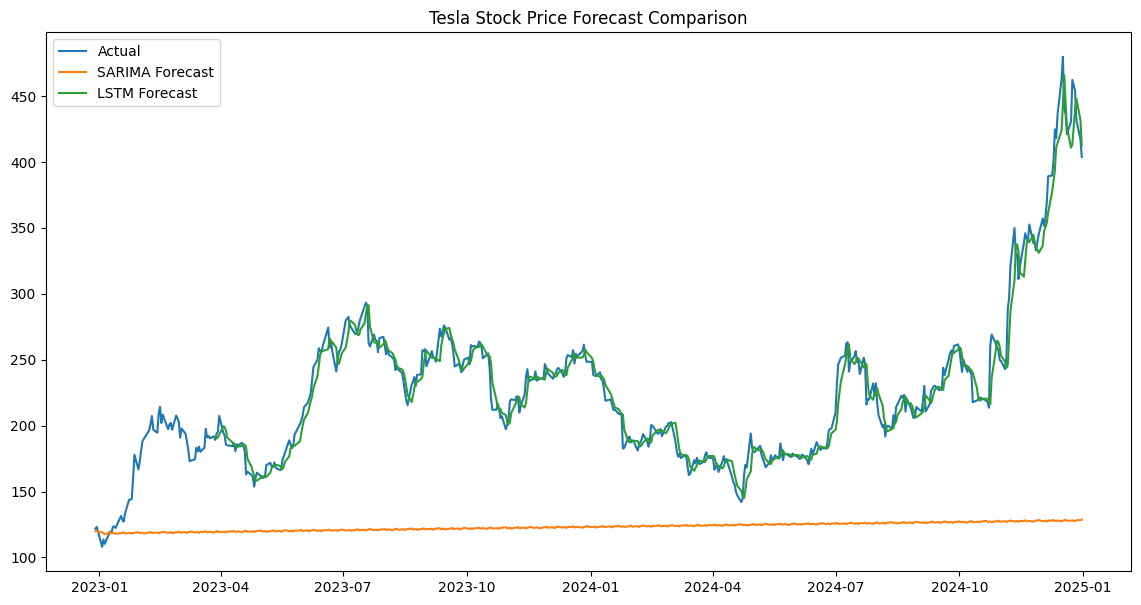

In [67]:
plt.figure(figsize=(14,7))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sarima_pred, label='SARIMA Forecast')
plt.plot(test_trimmed.index, lstm_pred, label='LSTM Forecast')
plt.title('Tesla Stock Price Forecast Comparison')
plt.legend()
plt.show()

from the plot we can infer LSTM model is performoring our target accuratly but the SARIMA is not

In [68]:
# Example parameter grid
param_grid = {
    'p': [1, 2, 3],
    'd': [1, 2],
    'q': [1, 2],
    'seasonal_order': [(1,1,1,7), (1,1,0,7)]
}

best_score = float('inf')
best_params = {}

# Manual grid search (use parallel processing for large grids)
for p in param_grid['p']:
    for d in param_grid['d']:
        for q in param_grid['q']:
            for s_order in param_grid['seasonal_order']:
                try:
                    model = SARIMAX(train,
                                  order=(p,d,q),
                                  seasonal_order=s_order)
                    results = model.fit(disp=False)
                    aic = results.aic
                    if aic < best_score:
                        best_score = aic
                        best_params = {'order': (p,d,q),
                                     'seasonal_order': s_order}
                except:
                    continue

print(f'Best Parameters: {best_params}')

c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it ha

Best Parameters: {'order': (2, 1, 2), 'seasonal_order': (1, 1, 1, 7)}


In [ ]:
# Example tuning with Keras Tuner
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], 1),
        return_sequences=True))
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32)))
    model.add(Dense(1))
    
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='mse')
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2)

tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.2,
             verbose=0)

best_lstm = tuner.get_best_models(num_models=1)[0]

c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
